In [9]:
import pandas as pd

In [10]:
import os

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn

In [13]:
import numpy as np

In [14]:
import statsmodels.api as sm

In [15]:
PATH = '/Users/meetlu/Desktop/repos/UT/Mid-Project/csv report'

In [16]:
filenames = ['20231.csv', '202211.csv', '202212.csv']

In [17]:
files = []

In [18]:
for filename in filenames:
    files.append(os.path.join(PATH, filename))

In [19]:
files

['/Users/meetlu/Desktop/repos/UT/Mid-Project/csv report/20231.csv',
 '/Users/meetlu/Desktop/repos/UT/Mid-Project/csv report/202211.csv',
 '/Users/meetlu/Desktop/repos/UT/Mid-Project/csv report/202212.csv']

In [20]:
df_names = []

In [21]:
for i in range(1,len(files)+1):
    df_names.append('df' + str(i))

In [22]:
df_names

['df1', 'df2', 'df3']

In [23]:
d = {}

In [24]:
for i in range(len(df_names)):
    name = df_names[i]
    tmp = pd.read_csv(files[i])
    tmp['Time'] = filenames[i]
    d[name] = tmp

In [25]:
d

{'df1':                                                   name   price  score   dis  \
 0          Courtyard Austin Downtown/Convention Center  1414.0    8.2   0.2   
 1                                      The LINE Austin  1894.0    8.2   0.3   
 2                             Sentral East Austin 1630   840.0    8.1   1.1   
 3                             Sentral East Austin 1614  1000.0    9.1   1.1   
 4            Aiden by Best Western @ Austin City Hotel   955.0    8.2   2.2   
 ..                                                 ...     ...    ...   ...   
 177  Extended Stay America Suites - Austin - Northw...   503.0    5.8  14.2   
 178    Austin House with Back Yard - 15 Mi to Downtown  1467.0    9.0  12.8   
 179              Fairfield Inn and Suites Austin South   728.0    8.3   4.1   
 180   Residence Inn by Marriott Austin The Domain Area  1184.0    7.9   8.1   
 181               Motel 6-Austin, TX - South - Airport   664.0    4.7   2.7   
 
           Time  
 0    20231.c

In [26]:
df = pd.concat(d.values(), ignore_index=True)

In [27]:
df

,name,price,score,dis,Time
0,Courtyard Austin Downtown/Convention Center,1414.0,8.2,0.2,20231.csv
1,The LINE Austin,1894.0,8.2,0.3,20231.csv
2,Sentral East Austin 1630,840.0,8.1,1.1,20231.csv
3,Sentral East Austin 1614,1000.0,9.1,1.1,20231.csv
4,Aiden by Best Western @ Austin City Hotel,955.0,8.2,2.2,20231.csv
...,...,...,...,...,...
525,Courtyard Austin by Marriott Northwest/Lakeline,659.0,8.7,14.2,202212.csv
526,"Downtown, Convention Center, Capitol, Zilker P...",3895.0,8.3,1.9,202212.csv
527,Hotel Saint Cecilia,2749.0,9.0,1.1,202212.csv
528,Natiivo Austin VIII,1437.0,10.0,0.8,202212.csv


In [28]:
df["name"].value_counts()

Courtyard Austin Downtown/Convention Center                            3
A Secluded Urban Escape                                                3
The LINE Austin                                                        3
Residence Inn Austin Downtown / Convention Center                      3
Terrace on Shoal Creek #19                                             3
                                                                      ..
Natiivo Austin VII                                                     1
Evonify Stays - Mueller - Renovated Furnished Apartments               1
Vivant - Spacious 2BR King Bed Suites Close to Downtown and Airport    1
Luxe 2BD Apt Heart of Austin, SoCo District!                           1
Hotel Saint Cecilia                                                    1
Name: name, Length: 243, dtype: int64

In [29]:
index = df["name"].value_counts() == 3

In [30]:
sum(index)

103

In [31]:
df['hotel_count'] = df.groupby('name')['name'].transform('count')

In [32]:
df

,name,price,score,dis,Time,hotel_count
0,Courtyard Austin Downtown/Convention Center,1414.0,8.2,0.2,20231.csv,3
1,The LINE Austin,1894.0,8.2,0.3,20231.csv,3
2,Sentral East Austin 1630,840.0,8.1,1.1,20231.csv,3
3,Sentral East Austin 1614,1000.0,9.1,1.1,20231.csv,3
4,Aiden by Best Western @ Austin City Hotel,955.0,8.2,2.2,20231.csv,3
...,...,...,...,...,...,...
525,Courtyard Austin by Marriott Northwest/Lakeline,659.0,8.7,14.2,202212.csv,2
526,"Downtown, Convention Center, Capitol, Zilker P...",3895.0,8.3,1.9,202212.csv,3
527,Hotel Saint Cecilia,2749.0,9.0,1.1,202212.csv,1
528,Natiivo Austin VIII,1437.0,10.0,0.8,202212.csv,3


In [33]:
def cal_holiday(row):
    if row['Time'] == '20231.csv':
        return 0
    else:
        return 1

In [34]:
df['Holiday'] = df.apply(cal_holiday, axis=1)

In [35]:
df

,name,price,score,dis,Time,hotel_count,Holiday
0,Courtyard Austin Downtown/Convention Center,1414.0,8.2,0.2,20231.csv,3,0
1,The LINE Austin,1894.0,8.2,0.3,20231.csv,3,0
2,Sentral East Austin 1630,840.0,8.1,1.1,20231.csv,3,0
3,Sentral East Austin 1614,1000.0,9.1,1.1,20231.csv,3,0
4,Aiden by Best Western @ Austin City Hotel,955.0,8.2,2.2,20231.csv,3,0
...,...,...,...,...,...,...,...
525,Courtyard Austin by Marriott Northwest/Lakeline,659.0,8.7,14.2,202212.csv,2,1
526,"Downtown, Convention Center, Capitol, Zilker P...",3895.0,8.3,1.9,202212.csv,3,1
527,Hotel Saint Cecilia,2749.0,9.0,1.1,202212.csv,1,1
528,Natiivo Austin VIII,1437.0,10.0,0.8,202212.csv,3,1


In [37]:
df['price'] = df['price'].astype(int)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         530 non-null    object 
 1   price        530 non-null    int64  
 2   score        530 non-null    float64
 3   dis          530 non-null    float64
 4   Time         530 non-null    object 
 5   hotel_count  530 non-null    int64  
 6   Holiday      530 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 29.1+ KB


In [39]:
df.columns

Index(['name', 'price', 'score', 'dis', 'Time', 'hotel_count', 'Holiday'], dtype='object')

[Text(0, 0, '2023-1'), Text(1, 0, '2022-11'), Text(2, 0, '2022-12')]

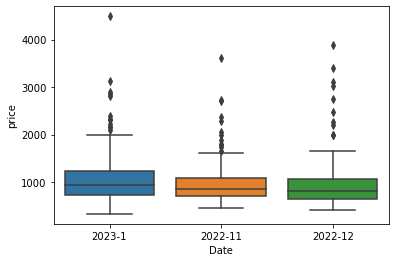

In [40]:
p1 = seaborn.boxplot(x='Time', y='price', data=df)
p1.set_xlabel("Date")
p1.set_xticklabels(['2023-1', '2022-11', '2022-12'])